In [2]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
from impedance.visualization import plot_nyquist, plot_bode
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import pandas as pd
from scipy import stat

In [3]:
def give_chi_square_wt(zexp,zmodel):
     chi_sqr_wt=np.sum(np.abs((zexp-zmodel))**2/np.abs(zexp)**2)
     return chi_sqr_wt

In [4]:
# import scipy
# import numpy as np
# R_initial=100
# Q_initial=1e-2
# alpha_initial=1
# R=R_initial
# Q=Q_initial
# alpha=alpha_initial

# def give_Zuni(freq,params):
#   Z=R*1/(np.tanh(np.sqrt(R*Q*(1j*w)**alpha))*np.sqrt(R*Q*(1j*w)**alpha))
#   return Z

# def give_chi_sqr(give_Zuni,exp_data):
#   for i in 
#   return chi_sqr

In [5]:
@element(num_params=2, units=["Ohm","F"],overwrite=True)
def TLMuni(p, f):
    omega = 2 * np.pi * np.array(f)
    Rion, Q = p[0], p[1]
    S=Rion*Q*(1j*omega)
    Z= Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
    return Z

In [6]:
exp_data=pd.read_excel("abhi experimental through plane data.xlsx",sheet_name="Cal",header=None)
exp_data=exp_data.to_numpy()
z_exp=exp_data[:,1]+1j*exp_data[:,2]
freq_exp_data=exp_data[:,0]


In [7]:
wt="mod"
itrR=0
itrQ=0
chi_sqr=np.zeros((30,30))
for R in np.linspace(100,1000,30):
    for Q in np.linspace(1e-6,1e-2,30):
        c_model=CustomCircuit(initial_guess=[R,Q],circuit="TLMuni")
        z_model=c_model.predict(frequencies=freq_exp_data)
        chi_sqr=give_chi_square_wt(z_exp,z_model)
        itrQ=itrQ+1
    itrQ=0
    itrR=itrR+1


c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
C:\Users\Gaming\AppData\Local\Temp\ipykernel_20676\1849433924.py:6: RuntimeWarning: overflow encountered in tanh
  Z= Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))


[[7.35108033e+07 4.77969425e+02 1.17663682e+02 6.60809184e+01
  5.33044370e+01 4.98574262e+01 4.93428704e+01 4.98631193e+01
  5.07475803e+01 5.17341566e+01 5.27155509e+01 5.36483927e+01
  5.45171666e+01 5.53187890e+01 5.60556591e+01 5.67324197e+01
  5.73544250e+01 5.79270224e+01 5.84552330e+01 5.89436273e+01
  5.93962977e+01 5.98168761e+01 6.02085719e+01 6.05742156e+01
  6.09163039e+01 6.12370403e+01 6.15383734e+01 6.18220292e+01
  6.20895404e+01 6.23422714e+01]
 [7.35108014e+07 4.75659269e+02 1.15617591e+02 6.41979063e+01
  5.15388397e+01 4.81830586e+01 4.77427513e+01 4.83253554e+01
  4.92633877e+01 5.02967911e+01 5.13196781e+01 5.22896931e+01
  5.31920752e+01 5.40243165e+01 5.47892656e+01 5.54919222e+01
  5.61379286e+01 5.67328681e+01 5.72819573e+01 5.77899302e+01
  5.82610175e+01 5.86989692e+01 5.91070957e+01 5.94883154e+01
  5.98452010e+01 6.01800230e+01 6.04947887e+01 6.07912762e+01
  6.10710645e+01 6.13355590e+01]
 [7.35108020e+07 4.73722822e+02 1.13859975e+02 6.25633654e+01
  4.

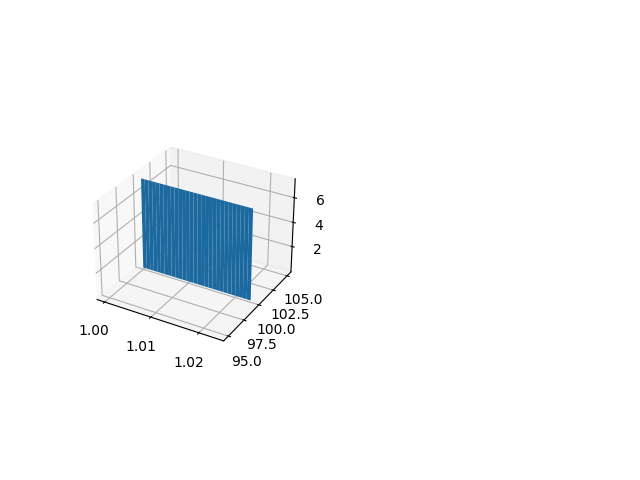

In [13]:
print(chi_sqr)
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
R, Q = np.meshgrid(np.linspace(100,1000,30), np.logspace(1e-6,1e-2,30))
ax.plot_surface(Q,100,chi_sqr)
plt.show()

